# 3.4. 차원축소, 특성추출, 매니폴드 학습 

## 3.4.1. 주성분 분석(PCA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import mglearn
from sklearn.model_selection import train_test_split
%matplotlib inline

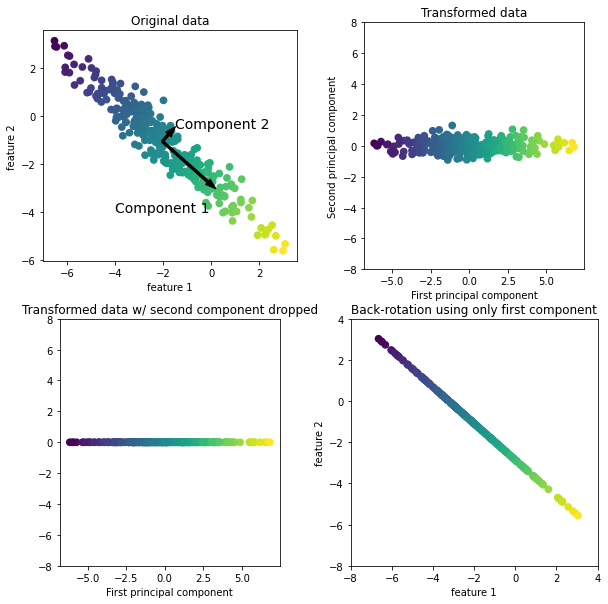

In [3]:
mglearn.plots.plot_pca_illustration()

### PCA를 적용해 유방암 데이터셋 시각화

#### 각 특성에 대한 히스토그램 작성

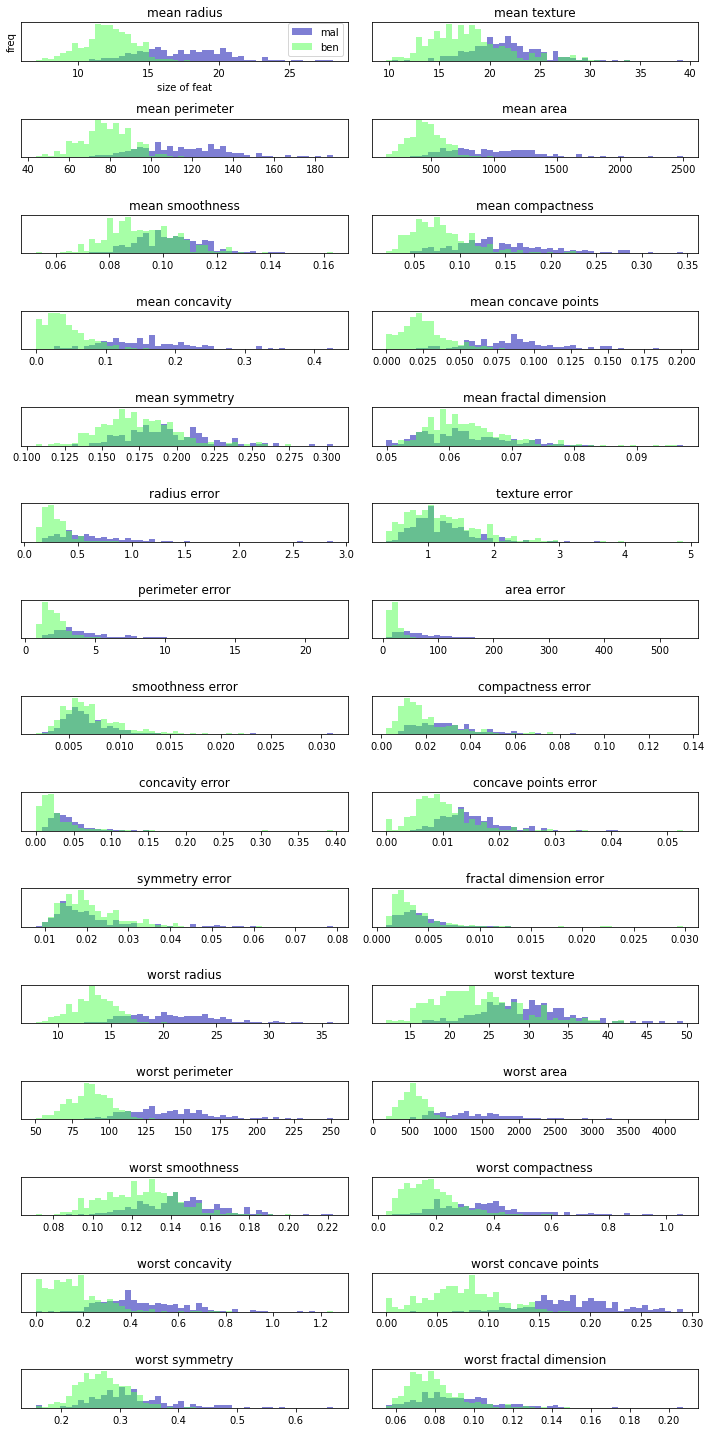

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30) :
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('size of feat')
ax[0].set_ylabel('freq')
ax[0].legend(['mal', 'ben'], loc='best')
fig.tight_layout()

어떤 특성이 샘플을 구별하는데 좋은 특성인가는 알 수 있지만, 특성 간의 상호작용 등은 전혀 알 수 없음   
-> PCA를 사용하여 주요 상호작용을 찾아낼 수 있다.

#### PCA 적용

In [6]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [7]:
from sklearn.decomposition import PCA

#데이터의 처음 두 개 주성분만 유지시킴
pca = PCA(n_components=2)
#PCA 모델 생성
pca.fit(X_scaled)

#처음 두개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_scaled)
print("original data : ", str(X_scaled.shape))
print("transformed data : ", str(X_pca.shape))

original data :  (569, 30)
transformed data :  (569, 2)


Text(0, 0.5, 'second main feat')

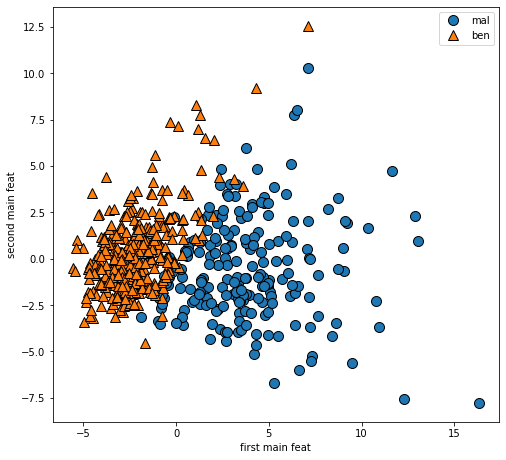

In [9]:
#처음 두 개의 주성분을 그래프로 나타냄
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["mal", "ben"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("first main feat")
plt.ylabel("second main feat")

In [10]:
print("PCA 주성분 형태 : ", pca.components_.shape)

PCA 주성분 형태 :  (2, 30)


In [11]:
print("PCA 주성분 : ", pca.components_)

PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


각 행은 주성분 하나씩 -> 중요도에 따라 정렬   
열은 원본 데이터의 특성에 대응하는 값

#### heatmap

Text(0, 0.5, 'pc')

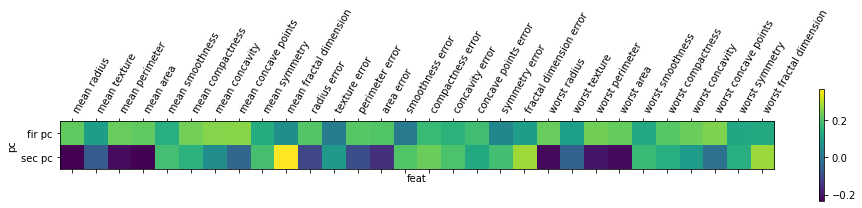

In [12]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["fir pc", "sec pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feat")
plt.ylabel("pc")

### eigenface 특성 추출

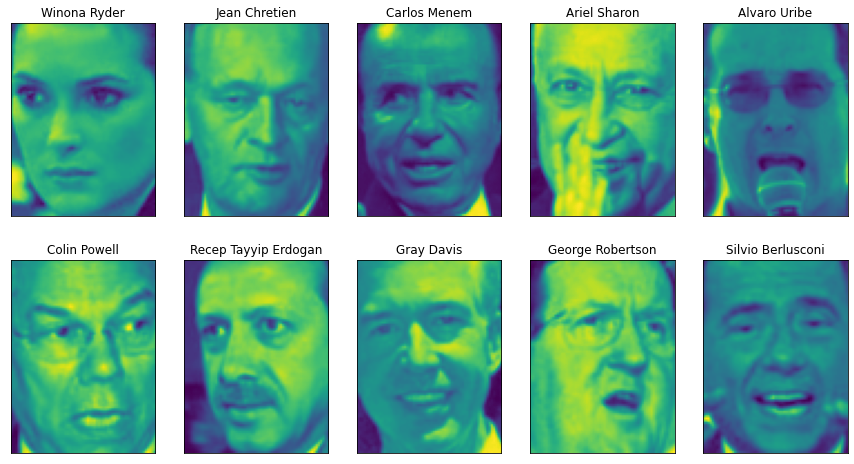

In [14]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images , axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [17]:
print("people.images.shape : ", people.images.shape)
print("classes : ", len(people.target_names))

people.images.shape :  (3023, 87, 65)
classes :  62


In [19]:
# counts of each targets
counts = np.bincount(people.target)

# print name and freq of target
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

George W Bush 와 Colin Powell이 유독 많음   
-> 편중을 제거하기 위해 사람당 50개의 이미지 추출

In [45]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255 # 0~255 컬러값을 0~1 min max scale

In [46]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

#이웃개수를 하나로 하여 KNeighborsClassfier  생성
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-knn test set score : {:.2f}".format(knn.score(X_test, y_test)))

1-knn test set score : 0.23


-> 주성분 분석을 통해 정확도 개선

In [47]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape : ", X_train_pca.shape)

X_train_pca.shape :  (1547, 100)


In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("test set acc : {:.2f}".format(knn.score(X_test_pca, y_test)))

test set acc : 0.31


In [49]:
print("pca.components_.shape : ", pca.components_.shape)

pca.components_.shape :  (100, 5655)


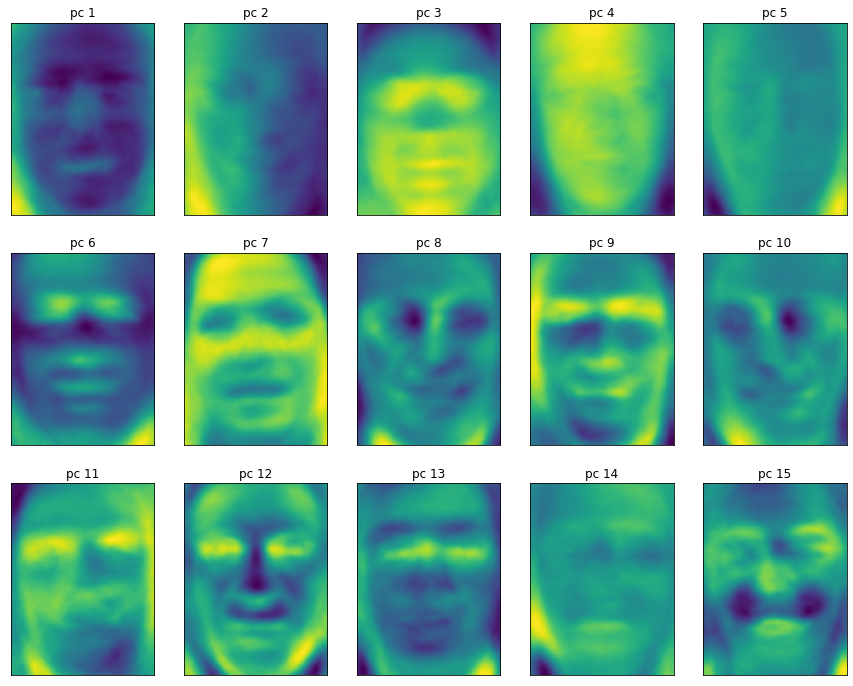

In [50]:
fig, axes = plt.subplots(3, 5, figsize=(15,12),
                         subplot_kw={'xticks' : (), 'yticks' : ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image.shape), cmap='viridis')
    ax.set_title("pc {}".format(i + 1))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 1.9s, 0.0min


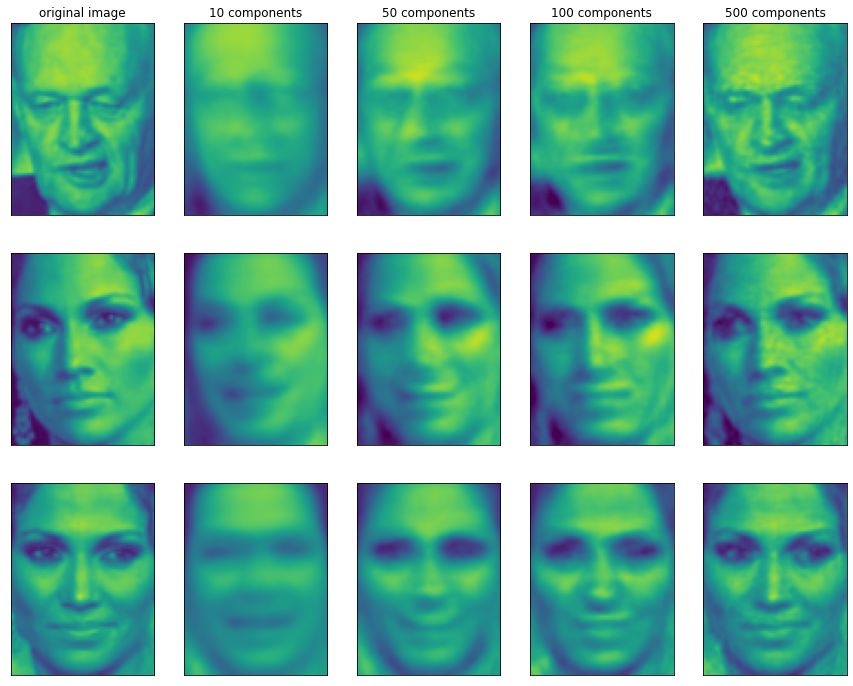

In [51]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'second pc')

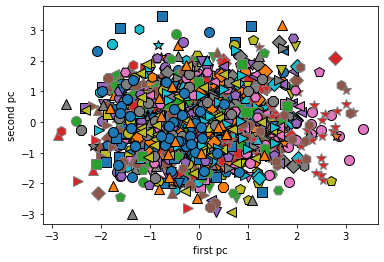

In [54]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("first pc")
plt.ylabel("second pc")